# Imports

In [281]:
#Data management
import pandas as pd
import numpy as np
import re

#Graficos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm, skew #for some statistics

# Data Import

In [282]:
train_df = pd.read_csv(r'C:\Users\Gonzalo\Documents\DH\Contenido\ds_blend_students_2020\Proyectos Propios\Prediction Models\House Prices Kaggle\Data\train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [283]:
train_df.shape

(1460, 81)

In [284]:
test_df = pd.read_csv(r'C:\Users\Gonzalo\Documents\DH\Contenido\ds_blend_students_2020\Proyectos Propios\Prediction Models\House Prices Kaggle\Data\test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [285]:
test_df.shape

(1459, 80)

In [286]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
full_data = pd.concat((train_df,test_df))
full_data.shape

(2919, 81)

# Data Overview

## Null Values Analysis

In [287]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [288]:
round(train_df.isnull().sum().sort_values(ascending= False).apply(lambda x : x/train_df.shape[0]*100),2).nlargest(22)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
YearRemodAdd     0.00
MSSubClass       0.00
dtype: float64

Features with more than 30% of missing values will probably be erased, as inputing such values could bias the sample.
The features that surpass such threshhold are:
- PoolQC 
- MiscFeature
- Alley
- Fence
- FireplaceQu

## Correlations 

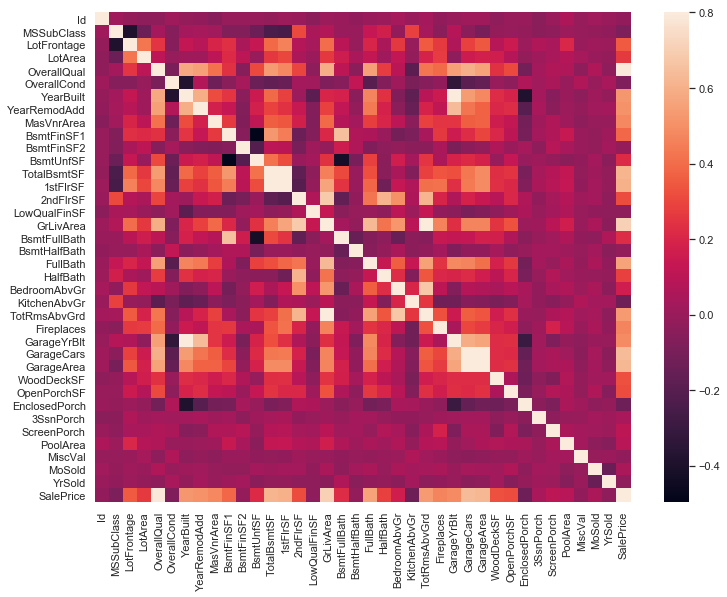

In [289]:
plt.figure(figsize=[12,9])
sns.heatmap(train_df.corr(),vmax=0.8)

### Strong Correlation with SalePrice:

#### Positive Correlation

In [290]:
train_df.corr()[:]['SalePrice'].sort_values(ascending=False)[:20]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

Most of the features are quite significant, which mean we have lots of valuable information. Great!

#### Correlacion Negativa

In [291]:
train_df.corr()[:]['SalePrice'].sort_values(ascending=True)[:5]

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64

#### Feature Correlation

- **Year Built and YearRemodAdd**: Seem to be strongly correlated. 
- **TotalBsmtSF and 1stFlSF**: Are highly correlated, which makes sense, as nobody wants a house with a basement bigger than the 1st floor. 
- **Garage Cars and Garage Area**: The bigger the area, the more cars the garage can fit.

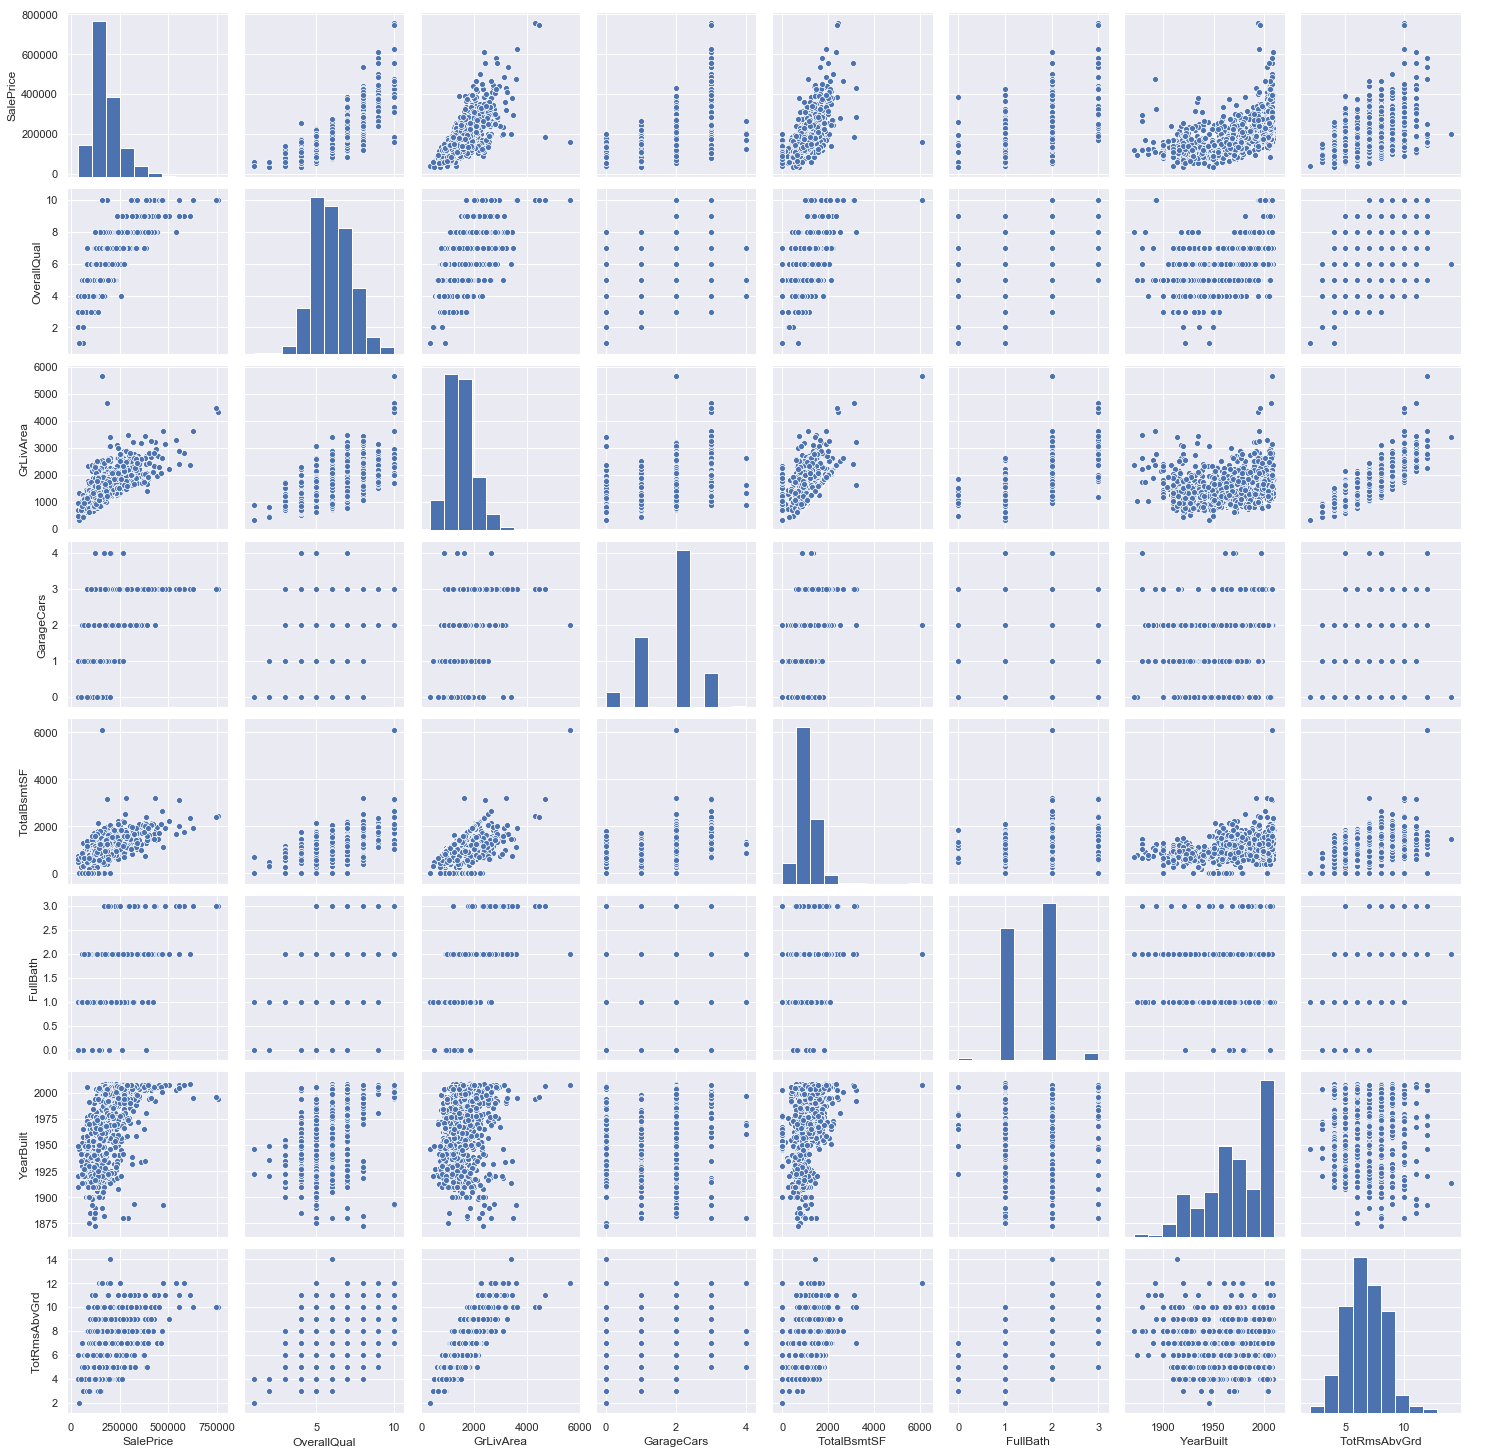

In [292]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','TotRmsAbvGrd' ]
sns.pairplot(train_df[cols], height = 2.5)
plt.show();

#### Scatterplot Observations - XVariable vs SalePrice:
- **OverallQual** seems to have a linear correlation with SalePrice. 
- **GrLivArea** seems to have an almost linear correlation with SalePrice as well, and we can see that a couple of observations do not follow the tendency. (*Outliers?*)
- **Garage Cars**: seems to have a linear correlation with SalePrice as well
- **TotalBsmtSF** seems to have a linear correlation with SalePrice too, but has an odd value (*outlier*?)
- **FullBath** seems to have a linear correlation with SalePrice.
- **Yearbuilt** seems to be positively correlated, not in a linear way
- **TotRmsAbv**: seems to have an almost linear correlation with SalePrice.

Hypothesis: A linear model might perform pretty good due to the high amount of linear correlations of the variables.

## SalePrice Analysis

#### SalePrice vs OverallQual

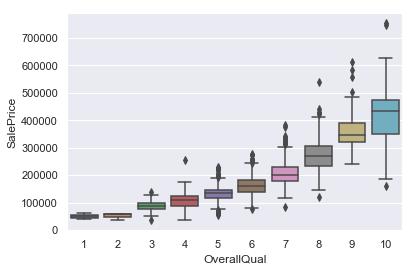

In [293]:
sns.boxplot(x='OverallQual',y='SalePrice',data=train_df)

Parece haber una relacion practicamente lineal entre las dos variables. 

#### SalePrice vs GrLivArea

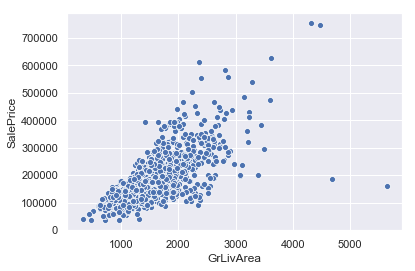

In [294]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_df)

In this graph we can see the **two outliers** once again. Let's eliminate them for the sake of the analysis.

**DECISIONS**: Eliminate outliers with more area and less price than the amounts it should have.

### SalePrice vs Garage Cars

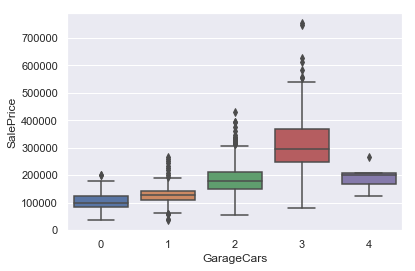

In [295]:
sns.boxplot(x='GarageCars',y='SalePrice',data=train_df)

#### SalePrice vs TotalBsmtSF

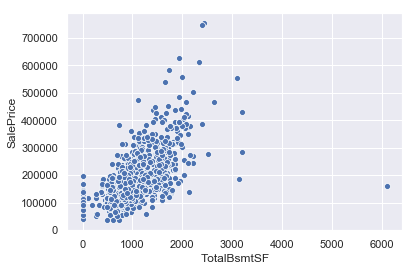

In [296]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train_df)

We can see an outlier at the bottom right of the graph.

**DECISIONS**: Eliminate the outlier

#### SalePrice vs FullBath

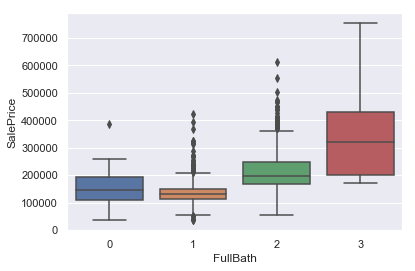

In [297]:
sns.boxplot(x='FullBath',y='SalePrice',data=train_df)

#### SalePrice vs YearBuilt

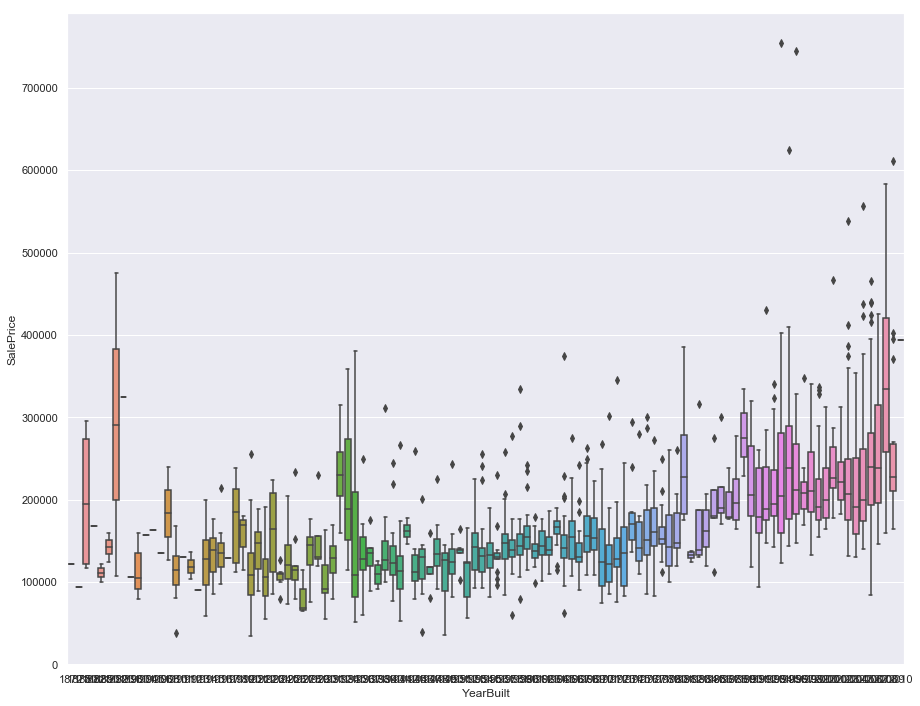

In [298]:
plt.figure(figsize=[15,12])
sns.boxplot(x='YearBuilt',y='SalePrice',data=train_df)

**DECISIONS**: Remove the 3 outliers on the top right of the sample

#### SalePrice vs TotalRmsAbvGrd

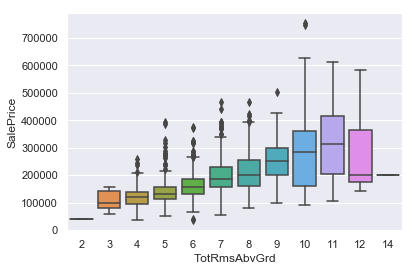

In [299]:
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=train_df)

**SECTION DECISIONS**: 
- Year Built = Remove the 3 outliers with the highest price 
- TotalBsmtSF = Remove outliers
- GrLivArea = Remove outliers

## Outliers

### Outlier removal 1: Year Built

In [300]:
train_df[:][['SalePrice','YearBuilt']].sort_values(by='SalePrice',ascending=False)[:3]

,SalePrice,YearBuilt
691,755000,1994
1182,745000,1996
1169,625000,1995


In [301]:
yb_outliers = train_df[:][['SalePrice','YearBuilt']].sort_values(by='SalePrice',ascending=False)[:3].index
train_df.drop(yb_outliers,axis=0, inplace=True)
train_df[:][['SalePrice','YearBuilt']].sort_values(by='SalePrice',ascending=False)[:3]

,SalePrice,YearBuilt
898,611657,2009
803,582933,2008
1046,556581,2005


In [302]:
train_df.shape

(1457, 81)

### Outlier removal 2: TotalBsmtSF

In [303]:
train_df[['TotalBsmtSF','SalePrice']].sort_values(by='TotalBsmtSF',ascending=False)[:1]

,TotalBsmtSF,SalePrice
1298,6110,160000


In [304]:
TBSF_outlier = train_df[['TotalBsmtSF','SalePrice']].sort_values(by='TotalBsmtSF',ascending=False)[:1].index
train_df.drop(TBSF_outlier,inplace=True)
train_df.shape

(1456, 81)

### Outlier removal 3: GrLivArea

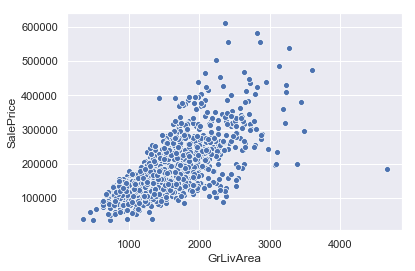

In [305]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_df)

One of the 2 outliers was already eliminated with the outlier that were erased on the previous two outlier analysis. Let's remove the other one.

In [306]:
train_df[['SalePrice','GrLivArea']].sort_values(by='GrLivArea',ascending=False)[0:1]

,SalePrice,GrLivArea
523,184750,4676


In [307]:
gla_outlier = train_df[['SalePrice','GrLivArea']].sort_values(by='GrLivArea',ascending=False)[0:1].index
train_df.drop(gla_outlier,inplace=True)
train_df.shape

(1455, 81)

## Missing Values

In [308]:
round(full_data.isnull().sum().sort_values(ascending= False).apply(lambda x : x/full_data.shape[0]*100),2).nlargest(22)

PoolQC          99.66
MiscFeature     96.40
Alley           93.22
Fence           80.44
SalePrice       49.98
FireplaceQu     48.65
LotFrontage     16.65
GarageQual       5.45
GarageYrBlt      5.45
GarageFinish     5.45
GarageCond       5.45
GarageType       5.38
BsmtExposure     2.81
BsmtCond         2.81
BsmtQual         2.77
BsmtFinType2     2.74
BsmtFinType1     2.71
MasVnrType       0.82
MasVnrArea       0.79
MSZoning         0.14
Utilities        0.07
Functional       0.07
dtype: float64

Data Description.txt allows us to complete the missing values. Let's use it!

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Let's check the variables with more missing values

### PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [309]:
full_data['PoolQC'].value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [310]:
full_data['PoolQC'].fillna('0',inplace=True)
full_data['PoolQC'].replace({'Fa':1,'Gd':2,'Ex':3},inplace=True)
full_data['PoolQC'].value_counts()

0    2909
3       4
2       4
1       2
Name: PoolQC, dtype: int64

In [311]:
full_data['PoolQC'] = full_data['PoolQC'].astype(int)

### MiscFeature

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None


In [312]:
full_data['MiscFeature'].fillna('0',inplace=True)

Queda hacer las dummies

### Alley

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access


In [313]:
full_data['Alley'].fillna(0,inplace=True)

In [314]:
full_data['Alley'].value_counts()

0       2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

### Fence
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence



In [315]:
full_data['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [316]:
full_data['Fence'].fillna('None',inplace=True)

In [317]:
full_data['Fence'].value_counts()

None     2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

### FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace



In [318]:
full_data['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [319]:
full_data['FireplaceQu'].fillna('0',inplace=True)
full_data['FireplaceQu'].replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace= True)
full_data['FireplaceQu'].value_counts()

0    1420
4     744
3     592
2      74
1      46
5      43
Name: FireplaceQu, dtype: int64

### LotFrontage
We don't have any information about the missing values of this feature at the txt file, but it tells us it has to do with how much surface of the Lot has connection to the street, measured in feet. We will, then, use the neighborhood to input the values using the mean, as houses in the same neighborhood have the same surface leading to the street.

Let's calculate std so that we can check for the loss of variance in the feature after doing the estimation.

In [320]:
#Creamos la lista de barrios para poder hashear
list_n = []
for n in full_data['Neighborhood']: 
    if n not in list_n:
        list_n.append(n)

In [321]:
#Calculamos la desviacion estandar antes del reemplazo
for n in list_n:
    print(n,full_data[full_data['Neighborhood']==n]['LotFrontage'].std())

CollgCr 15.940401141218619
Veenker 28.63797013290805
Crawfor 19.141261531977374
NoRidge 21.99081823517921
Mitchel 26.794499314376353
Somerst 23.984739576152343
NWAmes 12.156334586882481
OldTown 15.64289563558416
BrkSide 12.722818114862548
Sawyer 15.165154340280473
NridgHt 26.685696743091476
NAmes 19.686198464461715
SawyerW 14.384331222756442
IDOTRR 15.454332964502429
MeadowV 8.521808031234457
Edwards 26.3720192626068
Timber 23.20236246721765
Gilbert 28.386654071977723
StoneBr 21.696189473756895
ClearCr 22.628056641444513
NPkVill 10.398488901209225
Blmngtn 4.919349550499537
BrDale 1.137147065368355
SWISU 9.912167123412138
Blueste 5.313504806936128


In [322]:
#Hacemos el reemplazo
full_data["LotFrontage"] = full_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [323]:
#Nuevamente calculamos la desviacion estandar a modo de ver que no cambio mucho:
for n in list_n:
    print(n,full_data[full_data['Neighborhood']==n]['LotFrontage'].std())

CollgCr 14.472721250232189
Veenker 23.44589825379988
Crawfor 17.1623861006729
NoRidge 19.168426420250867
Mitchel 23.78404659714828
Somerst 22.757844021642015
NWAmes 9.798732047349821
OldTown 15.314889216765822
BrkSide 12.027267249626682
Sawyer 12.25618013227933
NridgHt 26.462601825279226
NAmes 18.126233202810575
SawyerW 13.302447022040477
IDOTRR 14.952144325007318
MeadowV 8.164230193634587
Edwards 25.260725799834123
Timber 20.60903671611551
Gilbert 23.739319378466718
StoneBr 20.59316467599259
ClearCr 15.527153464643407
NPkVill 9.986156425677638
Blmngtn 4.49985302523063
BrDale 1.137147065368355
SWISU 9.484566597694347
Blueste 5.313504806936128


The std loss is not significant, great!

### GarageVariables

- **GarageFinish**: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
 
The % of MV for these features are the same, which probably means that the values are missing for the same observations. When they are missing is because it does not have a garage. 

In [324]:
full_data[full_data['GarageFinish'].isnull()][['GarageFinish','GarageType','GarageYrBlt','GarageQual','GarageArea']].sample(5)

,GarageFinish,GarageType,GarageYrBlt,GarageQual,GarageArea
1349,NaN,NaN,NaN,NaN,0.0
732,NaN,NaN,NaN,NaN,0.0
1329,NaN,NaN,NaN,NaN,0.0
257,NaN,NaN,NaN,NaN,0.0
1283,NaN,NaN,NaN,NaN,0.0


In [325]:
full_data[['GarageType','GarageCond','GarageYrBlt','GarageQual','GarageFinish']].dtypes

GarageType       object
GarageCond       object
GarageYrBlt     float64
GarageQual       object
GarageFinish     object
dtype: object

As we can see, the values are missing for the same observations.

**DECISIONS**: The categorical feature null values will be replaced with None, and the null values of the numerical values will be replaced by the mean.

- Categorical: Type, Cond, Qual, Finish
- Numeric: YrBlt


In [326]:
#Variables Categoricas
for col in ['GarageType','GarageCond','GarageQual','GarageFinish']:
    full_data[col].fillna('No garage',inplace=True)

In [327]:
#Verifiquemos que no modifique demasiado la varianza
full_data['GarageYrBlt'].std()

25.57428472390508

In [328]:
full_data['GarageYrBlt'].fillna(full_data['GarageYrBlt'].mean()).std()

24.86776200995288

In [329]:
#Variables Numericas
full_data['GarageYrBlt'].fillna(full_data['GarageYrBlt'].mean().astype(int),inplace=True)

#### GarageArea y GarageCars

We only have one missing value, so we will input using the mean.

In [330]:
full_data[full_data['GarageArea'].isnull()][['GarageCars','GarageType','GarageCond','GarageYrBlt','GarageQual','GarageFinish']]

,GarageCars,GarageType,GarageCond,GarageYrBlt,GarageQual,GarageFinish
1116,NaN,Detchd,No garage,1978.0,No garage,No garage


In [331]:
full_data['GarageArea'].fillna(full_data['GarageArea'].mean().astype(int),inplace=True)
full_data['GarageCars'].fillna(full_data['GarageCars'].mean().astype(int),inplace=True)

In [332]:
full_data[(full_data['GarageYrBlt'] == 1978) & (full_data['GarageType']=='Detchd')][['GarageCars','GarageType','GarageCond','GarageYrBlt','GarageQual','GarageFinish','GarageArea']]

,GarageCars,GarageType,GarageCond,GarageYrBlt,GarageQual,GarageFinish,GarageArea
275,2.0,Detchd,TA,1978.0,TA,Unf,672.0
390,1.0,Detchd,TA,1978.0,TA,Unf,384.0
911,1.0,Detchd,TA,1978.0,TA,Unf,252.0
1255,1.0,Detchd,TA,1978.0,TA,Unf,560.0
196,2.0,Detchd,TA,1978.0,TA,Unf,440.0
587,2.0,Detchd,TA,1978.0,TA,Unf,576.0
666,1.0,Detchd,No garage,1978.0,No garage,No garage,360.0
965,2.0,Detchd,TA,1978.0,TA,Unf,580.0
1116,1.0,Detchd,No garage,1978.0,No garage,No garage,472.0


### Bsmt Variables

**BsmtFinType2**: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

When the value is null, it means that it does not have a basement.

In [333]:
full_data[full_data['BsmtExposure'].isnull()][['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']].head()

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [334]:
(full_data[['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']]).dtypes

BsmtExposure    object
BsmtFinType2    object
BsmtFinType1    object
BsmtCond        object
BsmtQual        object
dtype: object

Los reemplazaremos por 'No Basement' al ser variables categoricas.

In [335]:
for col in ['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']:
    full_data[col].fillna('No Basement',inplace=True)

#### BsmtFullBath

In [336]:
#Veamos si falta algun otro dato en las filas que tienen el valor missing
full_data[full_data['BsmtFullBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
660,2121,20,RM,99.0,5940,Pave,0,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,No Basement,No Basement,No Basement,No Basement,NaN,No Basement,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,0,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,MnPrv,0,0,4,2008,ConLD,Abnorml,NaN
728,2189,20,RL,123.0,47007,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,4,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,0,None,0,0,7,2008,WD,Normal,NaN


In [337]:
#Chequeemos si los NA son los que no tienen
full_data['BsmtFullBath']

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
1454    0.0
1455    0.0
1456    1.0
1457    0.0
1458    0.0
Name: BsmtFullBath, Length: 2919, dtype: float64

As only 2 observations have missing values, we will input them using the median.

In [338]:
full_data['BsmtFullBath'] = full_data['BsmtFullBath'].fillna(full_data['BsmtFullBath'].median())
full_data['BsmtFullBath'].value_counts()

0.0    1707
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

#### BsmtHalfBath

In [339]:
full_data[full_data['BsmtHalfBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
660,2121,20,RM,99.0,5940,Pave,0,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,No Basement,No Basement,No Basement,No Basement,NaN,No Basement,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,TA,4,Typ,0,0,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,MnPrv,0,0,4,2008,ConLD,Abnorml,NaN
728,2189,20,RL,123.0,47007,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,Ex,11,Typ,2,4,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,0,None,0,0,7,2008,WD,Normal,NaN


In [340]:
full_data['BsmtHalfBath']

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1454    0.0
1455    0.0
1456    0.0
1457    1.0
1458    0.0
Name: BsmtHalfBath, Length: 2919, dtype: float64

In [1]:
#As with FullBath, we input using the median
full_data['BsmtHalfBath'] = full_data['BsmtHalfBath'].fillna(full_data['BsmtHalfBath'].median())

NameError: name 'full_data' is not defined

#### BsmtUnfSF, BsmtFinSF2 y BsmtFinSF1

In [342]:
full_data[full_data['BsmtUnfSF'].isnull()][['BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']]

,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
660,NaN,NaN,NaN,No Basement,No Basement,No Basement,No Basement,No Basement


In [343]:
for col in ['BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF']:
    full_data[col].fillna(0,inplace=True)
    full_data[col] = full_data[col].astype(float)

### MasVnrType, MasVnrArea

In [344]:
full_data[full_data['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']].sample(5)

,MasVnrType,MasVnrArea
1132,NaN,NaN
1150,NaN,198.0
1197,NaN,NaN
529,NaN,NaN
889,NaN,NaN


In [345]:
full_data[full_data['MasVnrType'] == 'None'][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
1453,None,0.0
1454,None,0.0
1455,None,0.0
1456,None,0.0


**We fill the null values with 'None' (Median) and MasVnrArea with 0**

In [346]:
full_data['MasVnrType'].fillna('None',inplace=True)
full_data['MasVnrArea'].fillna('0',inplace=True)

**Converting MasVnrArea to a float**

In [347]:
full_data['MasVnrArea'] = full_data['MasVnrArea'].astype(float)

### Functional 

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [348]:
full_data[full_data['Functional'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
756,2217,20,NaN,80.0,14584,Pave,0,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,0,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,0,None,0,0,2,2008,WD,Abnorml,NaN
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,0,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,0,None,0,0,9,2007,COD,Abnorml,NaN


In [349]:
full_data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

As told by the txt file, we can presume the values to be Typical.

In [350]:
full_data['Functional'].fillna('Typ',inplace=True)

### MSZoning 

In [351]:
full_data[full_data['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,NaN,109.0,21780,Grvl,0,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,0,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,0,None,0,0,3,2009,ConLD,Normal,NaN
756,2217,20,NaN,80.0,14584,Pave,0,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Typ,0,0,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,0,None,0,0,2,2008,WD,Abnorml,NaN
790,2251,70,NaN,60.0,56600,Pave,0,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,0,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,0,None,0,0,1,2008,WD,Normal,NaN
1444,2905,20,NaN,125.0,31250,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,0,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,0,None,0,0,5,2006,WD,Normal,NaN


As it is only 4 observations, we use the median value to fill.

In [352]:
full_data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [353]:
full_data['MSZoning'].fillna('RL',inplace=True)

### Utilities

In [354]:
full_data[full_data['Utilities'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,RL,109.0,21780,Grvl,0,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,0,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,0,None,0,0,3,2009,ConLD,Normal,NaN
485,1946,20,RL,64.0,31220,Pave,0,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,4,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,0,None,Shed,750,5,2008,WD,Normal,NaN


Fill with the median

In [355]:
full_data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [356]:
full_data['Utilities'].fillna('AllPub',inplace=True)

### SaleType

In [357]:
full_data[full_data['SaleType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1029,2490,20,RL,85.0,13770,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,4,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,0,None,0,0,10,2007,NaN,Normal,NaN


In [358]:
full_data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [359]:
full_data['SaleType'].fillna('WD',inplace=True)

### Electrical

In [360]:
full_data[full_data['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,None,0,0,5,2008,WD,Normal,167500.0


In [361]:
full_data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [362]:
full_data['Electrical'].fillna('SBrkr',inplace=True)

### Exterior Variables

In [363]:
full_data[full_data['Exterior1st'].isnull()][['Exterior1st','Exterior2nd']]

,Exterior1st,Exterior2nd
691,NaN,NaN


It is just one observation with both values null. We input them with the mean.

In [364]:
full_data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64

In [365]:
full_data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [366]:
full_data['Exterior1st'].fillna('VinylSd',inplace=True)
full_data['Exterior2nd'].fillna('VinylSd',inplace=True)

### KitchenQual

In [367]:
full_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [368]:
full_data['KitchenQual'].fillna('TA',inplace=True)
full_data['KitchenQual'].replace({'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5},inplace=True)

In [369]:
(full_data.isnull().sum()/full_data.shape[0]).sort_values(ascending=False).head()

SalePrice      0.499829
Heating        0.000000
RoofStyle      0.000000
RoofMatl       0.000000
Exterior1st    0.000000
dtype: float64

## Feature Engineering

### Mapping ordinal features to numbers

The features that will go through this treatment will be: 
'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold'
    

In [370]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(full_data[c].values)) 
    full_data[c] = lbl.transform(list(full_data[c].values))
    full_data[c] = full_data[c].astype(float)

# shape        
print('Shape full_data: {}'.format(full_data.shape))



Shape full_data: (2919, 81)


### Converting numerical features to categorical

The only feature that needs this treatment is MSSubClass.

In [371]:
full_data['MSSubClass'] = full_data['MSSubClass'].astype(str)
full_data['MSSubClass'].value_counts()

0.0     1079
5.0      575
4.0      287
11.0     182
1.0      139
6.0      128
13.0     128
8.0      118
10.0     109
15.0      61
9.0       48
7.0       23
3.0       18
14.0      17
2.0        6
12.0       1
Name: MSSubClass, dtype: int64

## Modelling - Regression

In [372]:
numeric_feats = full_data.dtypes[full_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = full_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolQC,19.256416
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
Alley,4.138385


In [373]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    full_data[feat] = boxcox1p(full_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [374]:
full_data.columns.shape

(81,)

Recuperamos los datasets iniciales ya sin los nulos

In [375]:
full_data = full_data.drop(['Id','Utilities'],axis=1)

#### Create Dummies for Categorical Variables

In [376]:
pd.options.display.max_columns = None

In [377]:
full_data = pd.get_dummies(full_data)
print(full_data.shape)
full_data.head()

(2919, 236)


,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_0.0,MSSubClass_1.0,MSSubClass_10.0,MSSubClass_11.0,MSSubClass_12.0,MSSubClass_13.0,MSSubClass_14.0,MSSubClass_15.0,MSSubClass_2.0,MSSubClass_3.0,MSSubClass_4.0,MSSubClass_5.0,MSSubClass_6.0,MSSubClass_7.0,MSSubClass_8.0,MSSubClass_9.0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No garage,MiscFeature_0,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.831328,19.212182,0.730463,0.0,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.0,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.

#### Let's get X_train and y_train back

In [378]:
train_df = full_data[:ntrain]
test_df = full_data[ntrain:]
test_df.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_0.0,MSSubClass_1.0,MSSubClass_10.0,MSSubClass_11.0,MSSubClass_12.0,MSSubClass_13.0,MSSubClass_14.0,MSSubClass_15.0,MSSubClass_2.0,MSSubClass_3.0,MSSubClass_4.0,MSSubClass_5.0,MSSubClass_6.0,MSSubClass_7.0,MSSubClass_8.0,MSSubClass_9.0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No garage,MiscFeature_0,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.221214,20.479373,0.730463,0.0,1.540963,0.0,2.055642,2.055642,14.121376,14.121376,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.055642,10.105326,1.540963,7.397498,8.780689,11.775114,1.820334,0.730463,11.818680,0.000000,0.0,11.818680,0.0,0.0,0.730463,0.000000,1.194318

### Imports

In [415]:
# Tools
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats

#Pipelines + CV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

**y_test does not have values for SalePrice so we will use the train_test_split method on the train_df to train and test the model, and then we will validate the algorithm with the test_df**

In [391]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('SalePrice',axis=1),train_df['SalePrice'],test_size=0.2)

### Lasso Regression

In [395]:
#Instanciamos 
lasso = Lasso()

# Fitteamos
lasso.fit(X_train,y_train)

# Predecimos
y_pred_la = lasso.predict(X_test)

# Medimos accuracy
print(mean_squared_error(y_pred_la,y_test))
print(mean_absolute_error(y_pred_la,y_test))
print(r2_score(y_pred_la,y_test))

2.620985790613135
1.222286566009983
-0.47770685203816377


### Ridge Regression

In [397]:
#Instanciamos 
ridge = Ridge()

# Fitteamos
ridge.fit(X_train,y_train)

# Predecimos
y_pred_ri = ridge.predict(X_test)

# Medimos accuracy
print(mean_squared_error(y_pred_ri,y_test))
print(mean_absolute_error(y_pred_ri,y_test))
print(r2_score(y_pred_ri,y_test))

0.5482961338514529
0.4929555914210943
0.9016237025704875


### Elastic-Net Regression

In [398]:
#Instanciamos 
elastic = ElasticNet()

# Fitteamos
elastic.fit(X_train,y_train)

# Predecimos
y_pred_el = elastic.predict(X_test)

# Medimos accuracy
print(mean_squared_error(y_pred_el,y_test))
print(mean_absolute_error(y_pred_el,y_test))
print(r2_score(y_pred_el,y_test))

1.9490749436870167
1.059052840825181
0.26896581068417147


### Decision Tree Regression

In [410]:
#Instanciamos 
dt = DecisionTreeRegressor()

# Fitteamos
dt.fit(X_train,y_train)

# Predecimos
y_pred_dt = dt.predict(X_test)

# Medimos accuracy
print(mean_squared_error(y_pred_dt,y_test))
print(mean_absolute_error(y_pred_dt,y_test))
print(r2_score(y_pred_dt,y_test))

1.5059194068655932
0.8840826455364735
0.721696787174397


### Decision Tree Regression CV

In [441]:
# Creamos los parametros
dt_max_depth = [2,4,None]

dt_min_samples_split = [2,5]

dt_max_features = ['auto','sqrt']

# Creamos la Param Grid
dt_param_grid = [
    {'max_depth':dt_max_depth,
    'min_samples_split':dt_min_samples_split,
    'max_features':dt_max_features}
]

dt_grid = GridSearchCV(dt, dt_param_grid, cv= 3)

dt_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 4, None],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_spl

In [442]:
dt_grid.best_score_

0.732647890911229

In [444]:
dt_grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Random Forest Regression

In [432]:
#Instanciamos 
rf = RandomForestRegressor()

# Fitteamos
rf.fit(X_train,y_train)

# Predecimos
y_pred_rf = rf.predict(X_test)

# Medimos accuracy
print(mean_squared_error(y_pred_rf,y_test))
print(mean_absolute_error(y_pred_rf,y_test))
print(r2_score(y_pred_rf,y_test))

0.7433486827597523
0.5851073477796682
0.8402586137049153


### Random Forest Regression CV

In [435]:
# Creamos los parametros
rf_n_estimators = np.arange(10,100)

rf_max_depth = [2,4]

rf_min_samples_split = [2,5]

rf_max_features = ['auto','sqrt']

rf_bootstrap = [True,False]

# Creamos nuestra Param_grid
rf_param_grid = [
    {'n_estimators':rf_n_estimators,
    'max_depth':rf_max_depth,
    'min_samples_split':rf_min_samples_split,
    'max_features':rf_max_features,
    'bootstrap':rf_bootstrap}
]

# Fitteamos
rf_grid = GridSearchCV(estimator = rf,param_grid = rf_param_grid, cv=3)

rf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                          'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
    

In [437]:
rf_grid.best_score_

0.8174032543537724

In [440]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=62, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Gradient Boosting Regression

In [445]:
#Instanciamos 
gb = GradientBoostingRegressor()

# Fitteamos
gb.fit(X_train,y_train)

# Predecimos
y_pred_gb = gb.predict(X_test)

In [446]:
# Medimos accuracy
print(mean_squared_error(y_pred_gb,y_test))
print(mean_absolute_error(y_pred_gb,y_test))
print(r2_score(y_pred_gb,y_test))

0.6353159599927846
0.5547939027119954
0.8746264664756068


### Gradient Boosting Regression CV

In [412]:
# Creamos los parametros
gb_n_estimators = [1000,2000,3000]
gb_learning_rate = [0.001,0.05,0.1]
gb_max_depth = [4,8,16]

# Creamos la Param Grid
gb_param_grid = [
    {'n_estimators':gb_n_estimators, 
     'learning_rate':gb_learning_rate,
     'max_depth':gb_max_depth}
]

gb_grid = GridSearchCV(gb, gb_param_grid, cv= 3)

gb_grid.fit(X_train,y_train)

0.8981447457607231

In [414]:
gb_grid.best_score_

0.8981447457607231

In [413]:
gb_grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)